In [2]:
import numpy as np
import os
import random
import pandas as pd
import pickle
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Preprocessing 

## downsizing

In [20]:
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
    return df


## 2017

In [3]:
# more models and better search 

import pandas as pd

# Load the dataset
df = pd.read_csv("../DataSet/2017/2017_DOS_DDoS.csv", low_memory=False)

df = df[df['Label'] != 'BENIGN']
print("before",df.shape)

import numpy as np
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)
# identify and remove duplicate rows
df.drop_duplicates(inplace=True)
print("after",df.shape)
df.drop(columns=['Destination IP','Timestamp','Flow ID','Fwd Header Length.1', 'Source IP','Source Port'], inplace = True)


before (380688, 85)
after (379736, 85)


In [6]:
# more models and better search 

import pandas as pd

# Load the dataset
df = pd.read_csv("../DataSet/2017/2017_DOS_DDoS.csv", low_memory=False)

df = df[df['Label'] != 'BENIGN']
print("before",df.shape)

import numpy as np
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)
# identify and remove duplicate rows
df.drop_duplicates(inplace=True)
print("after",df.shape)
df.drop(columns=['Destination IP','Timestamp','Flow ID','Fwd Header Length.1', 'Source IP','Source Port'], inplace = True)


Destination Port            int32
Protocol                     int8
Flow Duration               int32
Total Fwd Packets            int8
Total Backward Packets       int8
                           ...   
Idle Mean                 float32
Idle Std                  float32
Idle Max                  float32
Idle Min                  float32
Label                      object
Length: 79, dtype: object


## 2018

In [3]:
# more models and better search 

import pandas as pd

# Load the dataset
df_reader = pd.read_csv("../DataSet/2018/2018_DOS_DDoS.csv",chunksize=5000000, low_memory=False,usecols= lambda col: col!='Timestamp')


In [4]:
import os
for df in df_reader :                   
    df.drop(df[df['Label']!='Benign'].index,inplace=True)
        
    if(os.path.isfile("normal_2018.csv")):
        print("Updating dataset ",df.shape)
        df.to_csv("normal_2018.csv", mode='a', index= False,header=False)
    else:
        print("Creating dataset",df.shape)
        df.to_csv("normal_2018.csv", index= False)

Creating dataset (3736067, 79)


: 

: 

In [11]:
df = pd.read_csv("normal_2018.csv", low_memory=False)

print("before",df.shape)
print(df.dtypes)
import numpy as np
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)
# identify and remove duplicate rows
df.drop_duplicates(inplace=True)
print("after",df.shape)

before (1918234, 79)
Destination Port          object
Protocol                  object
Flow Duration             object
Total Fwd Packets         object
Total Backward Packets    object
                           ...  
Idle Mean                 object
Idle Std                  object
Idle Max                  object
Idle Min                  object
Label                     object
Length: 79, dtype: object
after (995965, 79)


In [12]:
df.drop(df[df['Label']=='Label'].index,inplace=True)
df.dtypes

Destination Port          object
Protocol                  object
Flow Duration             object
Total Fwd Packets         object
Total Backward Packets    object
                           ...  
Idle Mean                 object
Idle Std                  object
Idle Max                  object
Idle Min                  object
Label                     object
Length: 79, dtype: object

In [13]:
df = df.apply(pd.to_numeric, errors='ignore')

In [19]:
print(pd.DataFrame([df['Label'].unique(),
        [df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))

                      0                 1                       2  \
0  DDOS attack-LOIC-UDP  DDOS attack-HOIC  DDoS attacks-LOIC-HTTP   
1                  1730            198861                  575364   

                          3                 4                      5  \
0  DoS attacks-SlowHTTPTest  DoS attacks-Hulk  DoS attacks-GoldenEye   
1                       408            168287                  41406   

                       6  
0  DoS attacks-Slowloris  
1                   9908  


## 2019

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os

datasets_dir= "../DataSet"
dataset_2019_dir = os.path.join(datasets_dir,"2019")
grouped_path=os.path.join(dataset_2019_dir,'2019_attacks.csv')

for dataset in os.listdir(dataset_2019_dir):
    if (dataset.endswith(".csv") and dataset!='2019_Grouped_2.csv'):
        df_reader=pd.read_csv(os.path.join(dataset_2019_dir,dataset),chunksize=5000000,low_memory=False,usecols= lambda col: col!=['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port','Destination IP','Fwd Header Length.1', 'SimillarHTTP', 'Inbound','Timestame'])
        for df in df_reader :                
            #fixing the whitespace problem in column naming
            for i in df.columns:
                df=df.rename(columns={i:i.strip()})
            df = df[df['Label'] == 'BENIGN']

            df.replace([np.inf, -np.inf], np.nan, inplace=True)
            # Drop rows with NaN
            df.dropna(inplace=True) 
            if(os.path.isfile(grouped_path)):
                print("Updating dataset with",dataset,df.shape)
                df.to_csv(grouped_path, mode='a', index= False,header=False)
            else:
                print("Creating dataset")
                df.to_csv(grouped_path, index= False)


Creating dataset
Updating dataset with DrDoS_DNS.csv
Updating dataset with DrDoS_LDAP.csv
Updating dataset with DrDoS_MSSQL.csv
Updating dataset with DrDoS_NetBIOS.csv
Updating dataset with DrDoS_NTP.csv
Updating dataset with DrDoS_SNMP.csv
Updating dataset with DrDoS_SNMP.csv
Updating dataset with DrDoS_SSDP.csv
Updating dataset with DrDoS_UDP.csv
Updating dataset with LDAP.csv
Updating dataset with MSSQL.csv
Updating dataset with MSSQL.csv
Updating dataset with NetBIOS.csv
Updating dataset with Portmap.csv


KeyboardInterrupt: 

## 2018 + 2017

In [21]:
df_2017=pd.read_csv('./attacks_2017.csv')
print("2017",df_2017.shape)
df_2018=pd.read_csv('./attacks_2018.csv')
print("2018",df_2018.shape)


2017 (379736, 79)
2018 (995964, 79)
2017+2018 (1375700, 80)


In [22]:
df_2018.rename(columns={"Fwd Packet Length Std":'Fwd Packet Length Min'}, inplace=True)
df_2018.rename(columns={'Fwd Pkt Len Std':'Fwd Packet Length Std'}, inplace=True)
df_2018.to_csv('attacks_2018.csv',index=False)

In [29]:
df =pd.concat([df_2017, df_2018])
print("2017+2018",df.shape)


2017+2018 (1375700, 79)


In [30]:
df.loc[df['Label']=='DoS attacks-SlowHTTPTest', 'Label'] = 'DoS Slowhttptest'
df.loc[df['Label']=='DoS attacks-Hulk', 'Label'] = 'DoS Hulk'
df.loc[df['Label']=='DoS attacks-GoldenEye', 'Label'] = 'DoS GoldenEye'
df.loc[df['Label']=='DoS attacks-Slowloris', 'Label'] = 'DoS slowloris'
df.loc[df['Label']=='DDOS attack-HOIC', 'Label'] = 'DDoS HOIC'
df.loc[df['Label']=='DDOS attack-LOIC-UDP', 'Label'] = 'DDoS LOIC-UDP'
df.loc[df['Label']=='DDoS attacks-LOIC-HTTP', 'Label'] = 'DDoS LOIC-HTTP'
df.loc[df['Label']=='DDoS', 'Label'] = 'DDoS-LOIT'

_________ Type attacks _________$
           0              1                 2         3              4  \
0  DDoS-LOIT  DoS slowloris  DoS Slowhttptest  DoS Hulk  DoS GoldenEye   
1     128025          15704              5907    398410          51699   

               5          6               7  
0  DDoS LOIC-UDP  DDoS HOIC  DDoS LOIC-HTTP  
1           1730     198861          575364  
_________              _________$


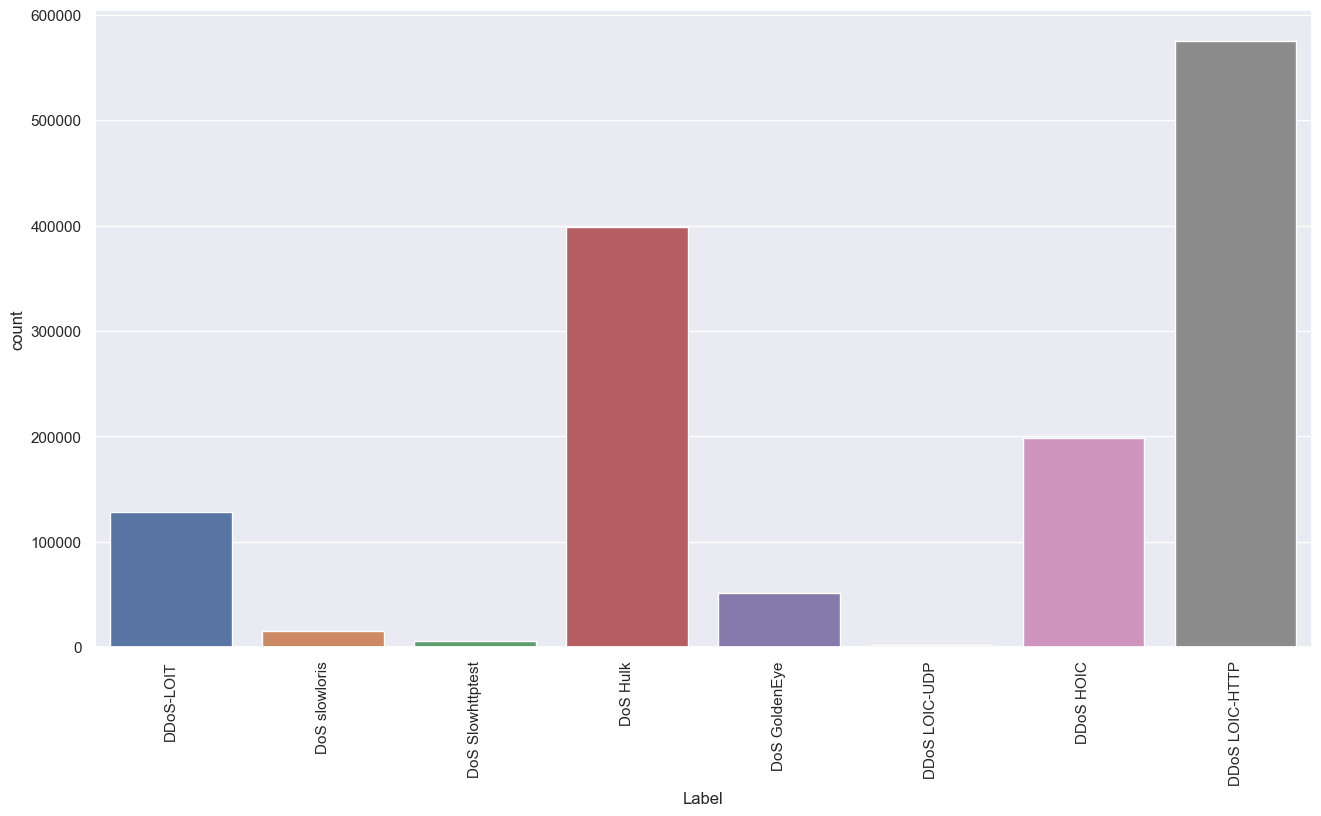

<Figure size 1570x827 with 0 Axes>

In [27]:
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()
plt.savefig('2017_2018.png')

In [31]:
df.to_csv("attacks_2017_2018.csv",index=False)

In [32]:
del df_2017,df_2018

### SMOTE

In [ ]:
import pandas as pd

# Define a dictionary to store the number of samples to select from each label
label_counts = {
    "DDoS-LOIT":12500,
    "DoS slowloris":12500,
    "DoS Slowhttptest":5907,
    "DoS Hulk":12500,
    "DoS GoldenEye":12500,
    "DDoS LOIC-UDP" :1730,
    "DDoS HOIC" :12500,
    "DDoS LOIC-HTTP"  :12500                            
}
df_sample= pd.DataFrame()
for label, count in label_counts.items():
    if  count >0:
        rows=df[df["Label"] == label].shape[0]
        print(label,rows)
            
        label_chunk = df[df["Label"] == label].sample(n=min(count,rows))
        label_counts[label]=max(0,count-rows)
        df_sample=pd.concat([df_sample,label_chunk])
        
print("Dataset reduction Completed",df_sample.shape)

print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df_sample[df_sample['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df_sample)
plt.xticks(rotation=90)
plt.show()
plt.clf()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X,y=smote.fit_resample(df_sample.drop(columns="Label"),df_sample["Label"])
df=pd.concat([pd.DataFrame(X), pd.DataFrame({'Label': y})], axis=1)

print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()
df.to_csv("attacks_2017_2018_augmented.csv",index=False)

## Sample data

In [ ]:

filename = os.path.join("C:\PFE","Dataset_Reduced_300.csv")

# Get the number of lines
num_lines = sum(1 for l in open(filename))

# Size of 1% of lines
size = int(num_lines / 10)

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = random.sample(range(1, num_lines), num_lines - size)

# Read the random sample of rows
df = pd.read_csv(filename, skiprows=skip_idx)


df.drop(columns=['Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd URG Flags',
       'Bwd PSH Flags', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Bwd URG Flags'])

## Grouped Data 300000 with SMOTE

In [4]:
# more models and better search 

import pandas as pd

# Load the dataset
#df = pd.read_csv("/content/drive/MyDrive/PFE/Datasets/Cleaned data/augmented_datast_300.csv", low_memory=False)



# Data Transformation

In [33]:

# Separate the target variable
X = df.drop(["Label"], axis=1)
le = LabelEncoder()
y = le.fit_transform(df["Label"])
print(le.classes_)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
del df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

del X, y

['DDoS HOIC' 'DDoS LOIC-HTTP' 'DDoS LOIC-UDP' 'DDoS-LOIT' 'DoS GoldenEye'
 'DoS Hulk' 'DoS Slowhttptest' 'DoS slowloris']


# Data Mining

## Hyperparameter Tuning

In [16]:
models = [
    ("RF", RandomForestClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("ADA", AdaBoostClassifier(random_state=42)),
    ("XGB", XGBClassifier(random_state=42)),
    ("LGBM", LGBMClassifier(random_state=42)),
    ("CAT", CatBoostClassifier(random_state=42))
]

params = {
    "RF": {
        "n_estimators": [100, 200, 500],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"]
    },
    "ADA": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0],
        "algorithm": ["SAMME", "SAMME.R"]
    },
    "XGB": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 6, 9],
        "learning_rate": [0.01, 0.1, 0.5],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
    },
    "LGBM": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 6, 9],
        "learning_rate": [0.01, 0.1, 0.5],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
    },
    "CAT": {
        "iterations": [100, 200, 500],
        "depth": [3, 6, 9],
        "learning_rate": [0.01, 0.1, 0.5],
        "l2_leaf_reg": [1, 3, 5, 7, 9]
    }
}


model_dir = "8_Classifiers_test"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

metrics = {
    "Accuracy": accuracy_score,
    "F1 Score": f1_score,
    "Precision": precision_score,
    "Recall": recall_score
}

eval_results = {metric: [] for metric in metrics}

for name, model in models:
    random_search = RandomizedSearchCV(model, params[name], n_iter=10, cv=3, n_jobs=-1, random_state=42)

    print(f"Starting RandomizedSearchCV for {name}...")
    random_search.fit(X_train, y_train)
    print(f"Best params for {name}: {random_search.best_params_}")
    print(f"Best score for {name}: {random_search.best_score_:.4f}")

    model_path = os.path.join(model_dir, name + ".pkl")
    y_pred = random_search.best_estimator_.predict(X_test)

    Accuracy = accuracy_score(y_test, y_pred)
    eval_results["Accuracy"].append(Accuracy)    
    F1_Score = f1_score(y_test, y_pred, average='micro')
    eval_results["F1 Score"].append(F1_Score)
    Precision = precision_score(y_test, y_pred, average='micro')
    eval_results["Precision"].append(Precision)
    Recall = recall_score(y_test, y_pred, average='micro')
    eval_results["Recall"].append(Recall)

    with open(model_path, 'wb') as f:
        pickle.dump(random_search.best_estimator_, f)

results = pd.DataFrame({"Model": [name for name, _ in models]})
for metric_name in metrics:
    results[metric_name] = eval_results[metric_name]

results.to_csv(os.path.join(model_dir, "evaluation_results.csv"), index=False)
print("Models and results saved in {}".format(model_dir))

for metric_name in metrics:
    plt.figure(figsize=(10,5))
    plt.bar([name for name, _ in models], eval_results[metric_name])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(f'Model {metric_name} Comparison')
    plt.savefig(os.path.join(model_dir, f"{metric_name}_plot.png"))
    plt.close()

Starting RandomizedSearchCV for SVM...


## Best Parameters

In [ ]:


# import Classifier
from sklearn.neighbors import KNeighborsClassifier
#initiate the Classifier
Model=KNeighborsClassifier(n_neighbors=3, weights='uniform',
                           algorithm='ball_tree')
#training the model 
Model.fit(X_train, y_train)

In [35]:

models = [
    #("SVM", SVC(random_state=42, C=1.e-03, kernel='linear', gamma='scale')),
    ("RF", RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini',
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                   max_features='sqrt', n_jobs=-1)),
    ("XGB", XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1,
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1)),
    ("LGBM", LGBMClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1,
                             subsample=0.8, colsample_bytree=0.8, n_jobs=-1)),
    ("CAT", CatBoostClassifier(random_state=42, iterations=100, depth=6, learning_rate=0.1,
                                l2_leaf_reg=1, thread_count=multiprocessing.cpu_count())),
    #("KNN", KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree')),
    #("NB", GaussianNB()),
    ("ADA", AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=0.1,
                                algorithm='SAMME.R'))
]

model_dir = "dataset_2017_2018_2"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

metrics = {
    "Accuracy": accuracy_score,
    "F1 Score": f1_score,
    "Precision": precision_score,
    "Recall": recall_score
}

eval_results = {metric: [] for metric in metrics}

for name, model in models:
    print(f"Starting training for {name}...")
    model.fit(X_train, y_train)

    model_path = os.path.join(model_dir, name + ".pkl")
    y_pred = model.predict(X_test)

    Accuracy = accuracy_score(y_test, y_pred)
    eval_results["Accuracy"].append(Accuracy)  
    print("Accuracy",Accuracy)
      
    F1_Score = f1_score(y_test, y_pred, average='weighted')
    eval_results["F1 Score"].append(F1_Score)
    print("F1_Score",F1_Score)  
    
    Precision = precision_score(y_test, y_pred, average='weighted')
    eval_results["Precision"].append(Precision)
    print("Precision",Precision)  
    
    Recall = recall_score(y_test, y_pred, average='weighted')
    eval_results["Recall"].append(Recall)
    print("Recall",Recall)  

    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

results = pd.DataFrame({"Model": [name for name, _ in models]})
for metric_name in metrics:
    results[metric_name] = eval_results[metric_name]

results.to_csv(os.path.join(model_dir, "evaluation_results.csv"), index=False)
print("Models and results saved in {}".format(model_dir))

for metric_name in metrics:
    plt.figure(figsize=(10,5))
    plt.bar([name for name, _ in models], eval_results[metric_name])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(f'Model {metric_name} Comparison')
    plt.savefig(os.path.join(model_dir, f"{metric_name}_plot.png"))
    plt.close()


Starting training for RF...
Accuracy 0.9996183760994403
F1_Score 0.9996218537166522
Precision 0.9996269434885162
Recall 0.9996183760994403
Starting training for XGB...
Accuracy 0.9996801628261975
F1_Score 0.9996825536162645
Precision 0.9996862469710289
Recall 0.9996801628261975
Starting training for LGBM...
Accuracy 0.5997019699062296
F1_Score 0.5876246649342769


C:\Users\mahdj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision 0.7501936705670544
Recall 0.5997019699062296
Starting training for CAT...
0:	learn: 1.4467113	total: 2.57s	remaining: 4m 14s
1:	learn: 1.1543438	total: 4.97s	remaining: 4m 3s
2:	learn: 0.9568172	total: 7.38s	remaining: 3m 58s
3:	learn: 0.8120225	total: 9.78s	remaining: 3m 54s
4:	learn: 0.7003517	total: 12.3s	remaining: 3m 52s
5:	learn: 0.6105081	total: 14.6s	remaining: 3m 49s
6:	learn: 0.5355087	total: 17.1s	remaining: 3m 46s
7:	learn: 0.4719638	total: 19.5s	remaining: 3m 44s
8:	learn: 0.4187033	total: 21.9s	remaining: 3m 41s
9:	learn: 0.3719054	total: 24.4s	remaining: 3m 39s
10:	learn: 0.3317616	total: 27.1s	remaining: 3m 39s
11:	learn: 0.2969388	total: 29.8s	remaining: 3m 38s
12:	learn: 0.2668469	total: 32.4s	remaining: 3m 36s
13:	learn: 0.2396918	total: 34.9s	remaining: 3m 34s
14:	learn: 0.2159606	total: 37.5s	remaining: 3m 32s
15:	learn: 0.1950360	total: 40s	remaining: 3m 29s
16:	learn: 0.1763462	total: 42.5s	remaining: 3m 27s
17:	learn: 0.1595526	total: 44.8s	remaining: 

C:\Users\mahdj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision 0.9054058016715169
Recall 0.9438031547575779
Models and results saved in dataset_2017_2018_2


# Confusion matrix

_________ Type attacks _________$
          0      1              2          3      4      5      6         7   \
0  DDoS HOIC  MSSQL  DoS GoldenEye  DDoS-LOIT   LDAP   TFTP    Syn  DoS Hulk   
1      51699  51699          51699      51699  51699  51699  51699     51699   

      8        9      10              11             12                13  \
0    NTP  NetBIOS    UDP  DDoS LOIC-HTTP  DoS slowloris  DoS Slowhttptest   
1  51699    51699  51699           51699          51699             51699   

              14  
0  DDoS LOIC-UDP  
1          51699  
_________              _________$


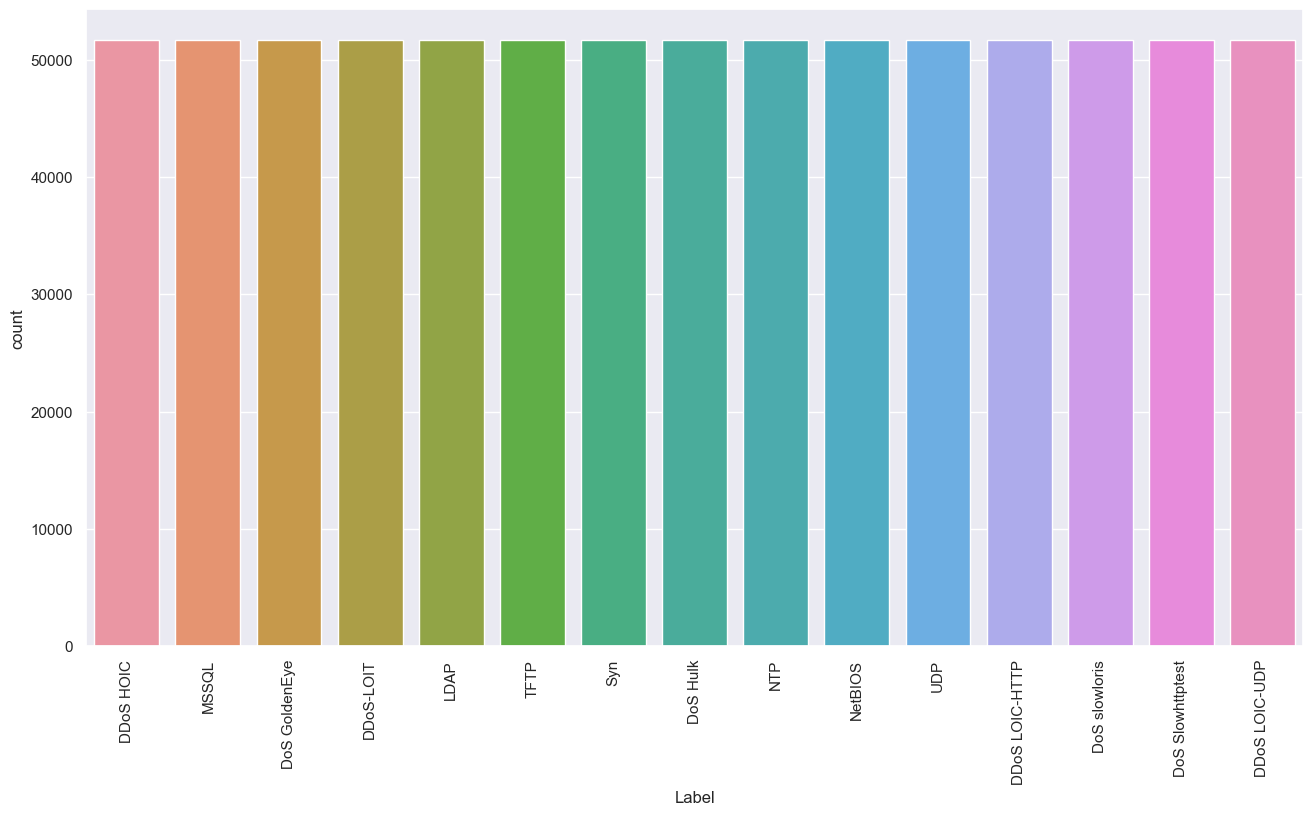

['DDoS HOIC' 'DDoS LOIC-HTTP' 'DDoS LOIC-UDP' 'DDoS-LOIT' 'DoS GoldenEye'
 'DoS Hulk' 'DoS Slowhttptest' 'DoS slowloris' 'LDAP' 'MSSQL' 'NTP'
 'NetBIOS' 'Syn' 'TFTP' 'UDP']


<Figure size 1570x827 with 0 Axes>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv("attacks_augmented.csv")

        
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate the target variable
X = df.drop(["Label"], axis=1)
le = LabelEncoder()
y = le.fit_transform(df["Label"])
print(le.classes_)
del df
# Get number of input features and number of classes for network
n_features = X.shape[1]
n_classes = np.unique(y).shape[0]
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
del X, y

In [49]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

model_names = ["KNN"]
model_dir = "Attacks_15_50"

metrics = {
    "Accuracy": accuracy_score,
    "F1 Score": f1_score,
    "Precision": precision_score,
    "Recall": recall_score
}

eval_results = {metric: [] for metric in metrics}

for name in model_names:
    print(f"Loading model {name}...")
    model_path = os.path.join(model_dir, name + ".pkl")

    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    y_pred = model.predict(X_test)

    Accuracy = accuracy_score(y_test, y_pred)
    eval_results["Accuracy"].append(Accuracy)  
    print("Accuracy",Accuracy)
      
    F1_Score = f1_score(y_test, y_pred, average='weighted')
    eval_results["F1 Score"].append(F1_Score)
    print("F1_Score",F1_Score)  
    
    Precision = precision_score(y_test, y_pred, average='weighted')
    eval_results["Precision"].append(Precision)
    print("Precision",Precision)  
    
    Recall = recall_score(y_test, y_pred, average='weighted')
    eval_results["Recall"].append(Recall)
    print("Recall",Recall)  
    #calculate the confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    # convert the confusion matrix to a pandas DataFrame
    conf_df = pd.DataFrame(conf_mat, index=le.classes_, columns=le.classes_)

    # plot the confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_df, annot=True, fmt="d", cbar=False)
    plt.title(f"{name}_Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.savefig(os.path.join(model_dir, f"{name}_confusion_matrix.png"))
    plt.close()



Loading model KNN...
Accuracy 0.9818500680219475
F1_Score 0.981875257535972
Precision 0.9820549193991165
Recall 0.9818500680219475


NameError: name 'results' is not defined

# ensemble model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

df= pd.read_csv("attacks_augmented.csv")
print(df.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Separate the target variable
X = df.drop(["Label"], axis=1)
le = LabelEncoder()
y = le.fit_transform(df["Label"])
print(le.classes_)
del df
# Get number of input features and number of classes for network
n_features = X.shape[1]
n_classes = np.unique(y).shape[0]
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
del X, y
gc.collect()

(775485, 79)
['DDoS HOIC' 'DDoS LOIC-HTTP' 'DDoS LOIC-UDP' 'DDoS-LOIT' 'DoS GoldenEye'
 'DoS Hulk' 'DoS Slowhttptest' 'DoS slowloris' 'LDAP' 'MSSQL' 'NTP'
 'NetBIOS' 'Syn' 'TFTP' 'UDP']


0

In [9]:
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import pickle
# Load the trained models
model_names = [ "RF", "XGB", "LGBM","KNN"]
models = []
for name in model_names:
    model_path = os.path.join('Attacks_15_50', name + ".pkl")
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
        # Ravel the predictions to ensure they're 1D
    #if name == "CAT":
    #    model.predict = lambda X: np.ravel(model.predict(X))

    #sample_prediction = model.predict(X_train[:10])
    #print(f"Model: {name}, Prediction shape: {sample_prediction.shape}")
    models.append((name, model))
# Ensemble learning
print('Initiating the ensemble voting classifier')
ensemble = VotingClassifier(estimators=models, voting='hard')
print('Training the ensemble voting classifier')
ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
eval_ensemble = {metric: [] for metric in metrics}

eval_ensemble["Accuracy"].append(accuracy_score(y_test, y_pred_ensemble))
eval_ensemble["F1 Score"].append(f1_score(y_test, y_pred_ensemble, average='weighted'))
eval_ensemble["Precision"].append(precision_score(y_test, y_pred_ensemble, average='weighted'))
eval_ensemble["Recall"].append(recall_score(y_test, y_pred_ensemble, average='weighted'))

print(eval_ensemble)

Initiating the ensemble voting classifier
Training the ensemble voting classifier


KeyboardInterrupt: 

In [10]:
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Load the trained models
model_names = ["RF", "XGB", "LGBM",  "KNN"]
models = []
for name in model_names:
    model_path = os.path.join('Attacks_15_50', name + ".pkl")
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    models.append((name, model))

# Ensemble learning
print('Initiating the ensemble voting classifier')
ensemble = VotingClassifier(estimators=models, voting='hard')
print('Training the ensemble voting classifier')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

with open("ensemble_hard.pkl", 'wb') as f:
        pickle.dump(ensemble, f)
# Metrics
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
eval_ensemble = {metric: [] for metric in metrics}

eval_ensemble["Accuracy"].append(accuracy_score(y_test, y_pred_ensemble))
eval_ensemble["F1 Score"].append(f1_score(y_test, y_pred_ensemble, average='weighted'))
eval_ensemble["Precision"].append(precision_score(y_test, y_pred_ensemble, average='weighted'))
eval_ensemble["Recall"].append(recall_score(y_test, y_pred_ensemble, average='weighted'))

print(eval_ensemble)
# Confusion Matrix
conf_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)
conf_df_ensemble = pd.DataFrame(conf_mat_ensemble, index=le.classes_, columns=le.classes_)

# Plotting
plt.figure(figsize=(10, 10))
sns.heatmap(conf_df_ensemble, annot=True, fmt="d", cbar=False)
plt.title('Ensemble Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.savefig("Ensemble_confusion_matrix.png")
plt.close()

# Plotting the comparison of metrics
for metric_name in metrics:
    plt.figure(figsize=(10,5))
    plt.bar(["Ensemble"] + [name for name, _ in models], [eval_ensemble[metric_name]] + eval_results[metric_name])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(f'Model {metric_name} Comparison')
    plt.savefig(f"Ensemble_{metric_name}_plot.png")
    plt.close()


Initiating the ensemble voting classifier
Training the ensemble voting classifier
{'Accuracy': [0.9896967704081961], 'F1 Score': [0.9897216339176781], 'Precision': [0.989950494775677], 'Recall': [0.9896967704081961]}


NameError: name 'eval_results' is not defined

<Figure size 1000x500 with 0 Axes>

In [2]:
import pickle
import os
import seaborn as sns

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
eval_results = {metric: [] for metric in metrics}
model_names = ["hard_EM","soft_EM"]
models = []
for name in model_names:
    model_path = os.path.join('Attacks_15_50', name + ".pkl")
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    models.append((name, model))
for name, model in models:
    
    print(name)
    y_pred = model.predict(X_test)

    Accuracy = accuracy_score(y_test, y_pred)
    eval_results["Accuracy"].append(Accuracy)  
    print("Accuracy",Accuracy)
      
    F1_Score = f1_score(y_test, y_pred, average='weighted')
    eval_results["F1 Score"].append(F1_Score)
    print("F1_Score",F1_Score)  
    
    Precision = precision_score(y_test, y_pred, average='weighted')
    eval_results["Precision"].append(Precision)
    print("Precision",Precision)  
    
    Recall = recall_score(y_test, y_pred, average='weighted')
    eval_results["Recall"].append(Recall)
    print("Recall",Recall)  

results = pd.DataFrame({"Model": [name for name, _ in models]})
for metric_name in metrics:
    results[metric_name] = eval_results[metric_name]

[11:51:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[11:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  

In [44]:
import os
import seaborn as sns
import pandas as pd
a= pd.read_csv("./Attacks_15_50/EM_evaluation_results.csv")
b= pd.read_csv("./Attacks_15_50/evaluation_results.csv")

In [39]:
b=pd.concat([a,b])

In [20]:
b.Model!='ADA'

0     True
1     True
0     True
1     True
2     True
3     True
4     True
5    False
Name: Model, dtype: bool

In [40]:
b.drop(b[b['Model']=='ADA'].index,inplace=True)
b

,Model,Accuracy,F1 Score,Precision,Recall
0,hard_EM,0.989697,0.989722,0.989950,0.989697
1,soft_EM,0.989748,0.989779,0.990031,0.989748
0,CAT,0.987401,0.987446,0.987711,0.987401
1,RF,0.989136,0.989147,0.989282,0.989136
2,XGB,0.990026,0.990056,0.990311,0.990026
3,LGBM,0.990084,0.990111,0.990356,0.990084
4,KNN,0.981850,0.981875,0.982055,0.981850


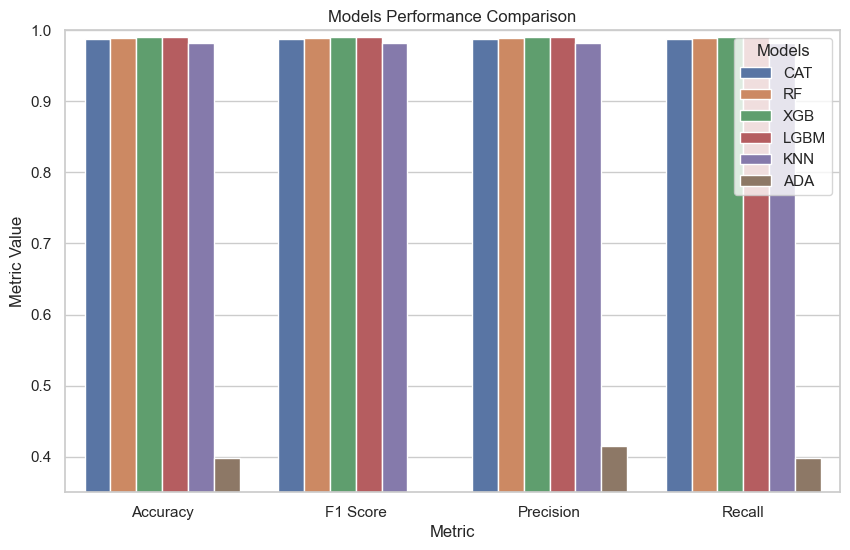

In [46]:
import matplotlib.pyplot as plt
# Plotting the dataset using Seaborn
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=b.melt(id_vars="Model", var_name="Metric"), x="Metric", y="value", hue="Model")
plt.title("Models Performance Comparison")
plt.xlabel("Metric")
plt.ylabel("Metric Value")
plt.ylim(0.35, 1.0)  # Adjust the y-axis limits if needed
plt.legend(title="Models")

# Display the plot
plt.show()

In [10]:
print(model)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            impor...
                                            mon

In [12]:
# Confusion Matrix
conf_mat_ensemble = confusion_matrix(y_test, y_pred)
conf_df_ensemble = pd.DataFrame(conf_mat_ensemble, index=le.classes_, columns=le.classes_)

# Plotting
plt.figure(figsize=(10, 10))
sns.heatmap(conf_df_ensemble, annot=True, fmt="d", cbar=False)
plt.title('Soft Ensemble Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.savefig("soft_Ensemble_confusion_matrix.png")
plt.close()


In [5]:

results.to_csv(os.path.join('Attacks_15_50', "EM_evaluation_results.csv"), index=False)
print("Models and results saved in {}".format('Attacks_15_50'))

Models and results saved in Attacks_15_50


# Features Importance

[01:59:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



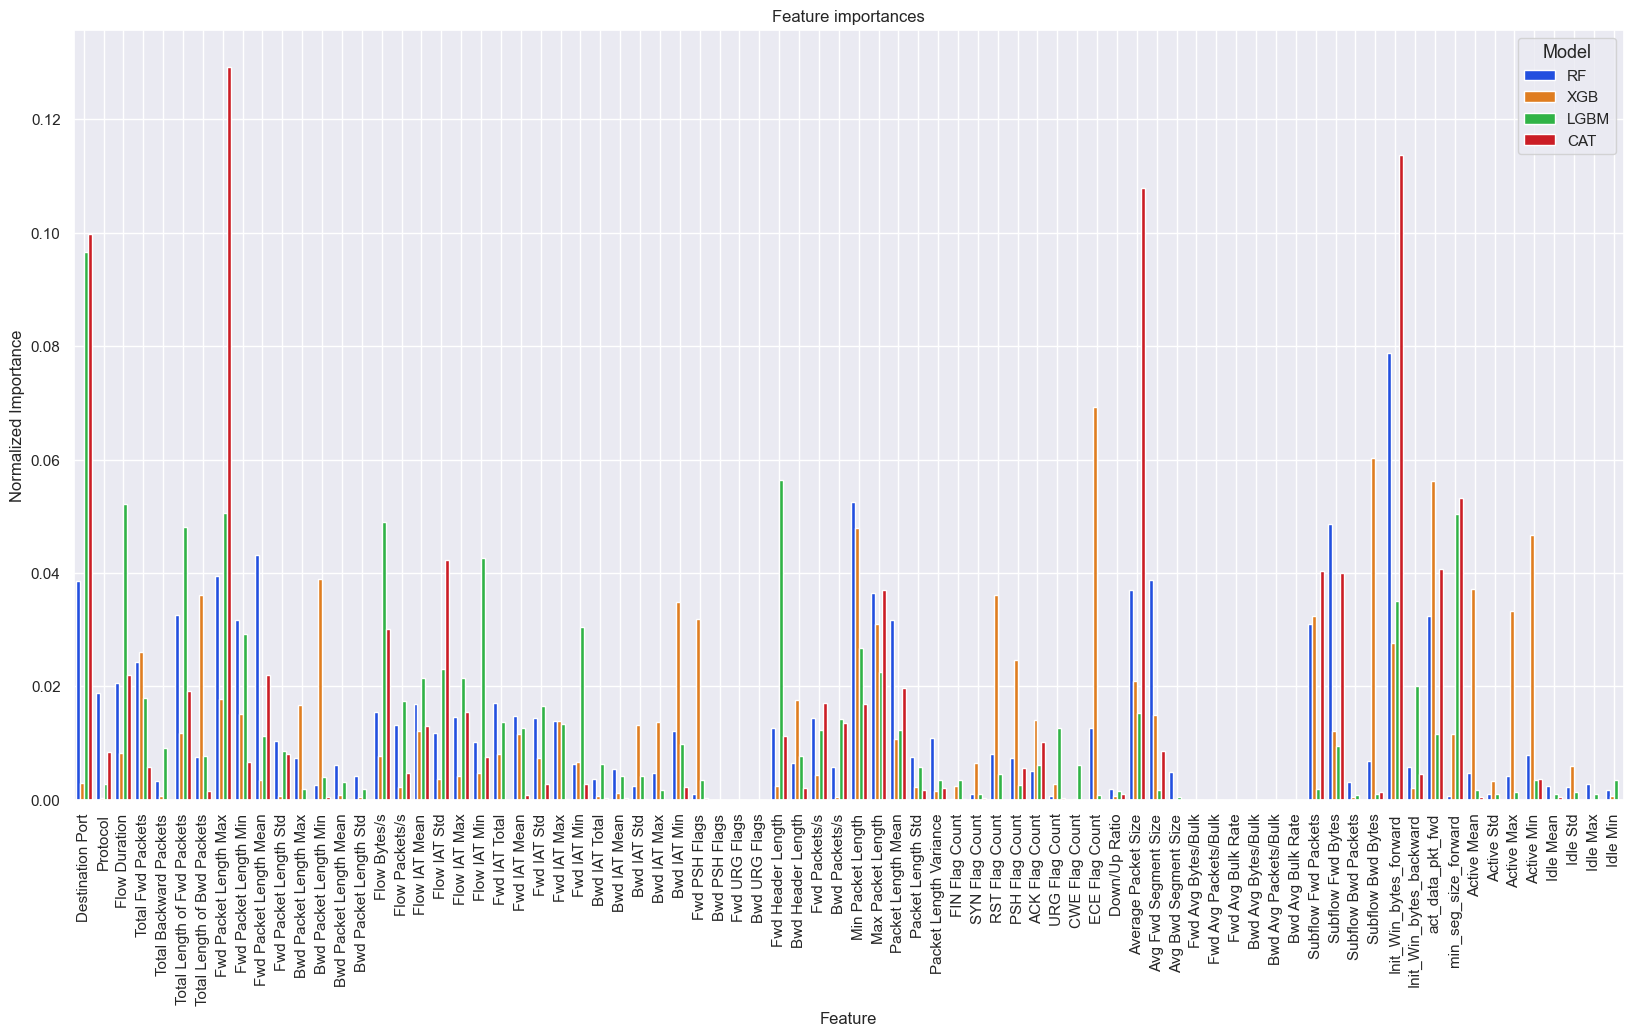

In [32]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load models
model_names = ["RF", "XGB", "LGBM", "CAT"]
dir = "Attacks_15_50"
models = {}
for name in model_names:
    with open(os.path.join(dir, name+'.pkl'), 'rb') as file:
        models[name] = pickle.load(file)

# Extract feature importances
feature_importances = {}
for name, model in models.items():
    if name in ["RF", "XGB", "LGBM"]:
        feature_importances[name] = model.feature_importances_
    elif name == "CAT":
        feature_importances[name] = model.get_feature_importance()

feature_names =  pd.read_csv("attacks_augmented.csv").sample(1).drop(columns=['Label']).columns

# Convert to DataFrame for easier plotting
df_fi = pd.DataFrame(feature_importances, index=feature_names)

# Normalize feature importances for comparison
df_fi = df_fi / df_fi.sum()

# Plot
plt.figure(figsize=(20, 10))

# Transpose the data frame for plotting
df_fi_T = df_fi.transpose()

# Melt the DataFrame to have models, features and importances in separate columns
df_fi_melted = df_fi_T.reset_index().melt(id_vars='index', var_name='Feature', value_name='Importance')

# Plot
sns.barplot(x='Feature', y='Importance', hue='index', data=df_fi_melted, palette='bright')
plt.title('Feature importances')
plt.ylabel('Normalized Importance')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.legend(title='Model', title_fontsize='13', loc='upper right')
plt.grid(True)
plt.show()


In [45]:
imp={}
for i in df_fi.columns:
    imp[i]=df_fi[df_fi[i]==0].index

In [50]:
imp['RF']

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')